Lista 3

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [39]:
alpha = 0.05
sigmas = [0.01, 0.5, 1]
ns = np.arange(10, 100, 5).astype(int)
b0, b1 = 2, 5

In [17]:
def pu_b1_known_var(sigma, alpha, x):
    return stats.norm.ppf(1-alpha/2) * sigma / np.sqrt(np.sum((x-np.mean(x))**2))

In [18]:
def pu_b0_known_var(sigma, alpha, x):
    return stats.norm.ppf(1 - alpha/2) * sigma * np.sqrt((1/ len(x) + np.mean(x)**2 / np.sum((x-np.mean(x))**2)))

In [19]:
def pu_b0_unknown_var(alpha, x, y, b1_hat, b0_hat):
    n = len(x)
    residuals = y - (b1_hat * x + b0_hat)
    s_squared = np.sum(residuals**2) / (n - 2)
    s = np.sqrt(s_squared)
    return stats.t.ppf(1 - alpha/2, n - 2) * s * np.sqrt(1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2))

In [20]:
def pu_b1_unknown_var(alpha, x, y, b1_hat):
    n = len(x)
    residuals = y - (b1_hat * x + np.mean(y) - b1_hat * np.mean(x))
    s_squared = np.sum(residuals**2) / (n - 2)  
    s = np.sqrt(s_squared)
    return stats.t.ppf(1 - alpha/2, n - 2) * s / np.sqrt(np.sum((x - np.mean(x))**2))

In [21]:
def b1_estim(x,y):
    return np.sum((x - np.mean(x)) * (y))/np.sum((x-np.mean(x))**2)

In [22]:
def b0_estim(x,y):
    return np.mean(y) - b1_estim(x,y) * np.mean(x)

In [9]:
def generate_sample(n, b0, b1, sigma):
    eps = np.random.normal(0, sigma, n)
    x = np.linspace(1, n+1, n)
    y = b1 * x + b0 + eps
    return x, y

In [10]:
def mc_test(n, sigma, b0, b1, mc, alpha, known_var):
    b1_in, b0_in = 0,0
    for _ in range(mc):
        x, y = generate_sample(n, b0, b1, sigma)
        b1_hat, b0_hat = b1_estim(x,y), b0_estim(x, y)
        if known_var:
            pu_b0_, pu_b1_ = pu_b0_known_var(sigma, alpha, x), pu_b1_known_var(sigma, alpha, x)
        else:
            pu_b0_, pu_b1_ = pu_b0_unknown_var(alpha, x, y, b1_hat, b0_hat), pu_b1_unknown_var(alpha, x, y, b1_hat)
        if b1_hat - pu_b1_ < b1 < b1_hat + pu_b1_:
            b1_in += 1
        if b0_hat - pu_b0_ < b0 < b0_hat + pu_b0_:
            b0_in += 1
    return b1_in / mc * 100, b0_in / mc * 100

In [11]:
mc = 1000

In [57]:
p2_b1 = []
p2_b0 = []
for sigma in sigmas:
    p1_b1 = []
    p1_b0 = []
    for n in ns:
        b1_prob, b0_prob = mc_test(n, sigma, b0, b1, mc, alpha, True)
        p1_b1.append(b1_prob)
        p1_b0.append(b0_prob)
    p2_b1.append(p1_b1)
    p2_b0.append(p1_b0)
        

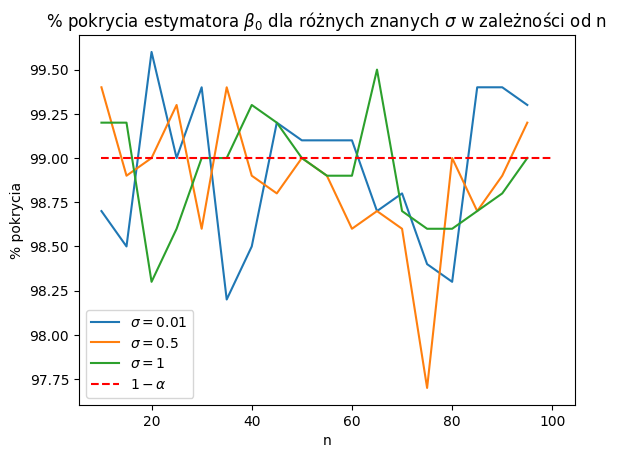

In [58]:
plt.plot(ns, p2_b0[0], label="$\\sigma = 0.01$")
plt.plot(ns, p2_b0[1], label="$\\sigma = 0.5$")
plt.plot(ns, p2_b0[2], label="$\\sigma = 1$")
plt.hlines((1-alpha)*100,10, 100, linestyle="--", color="red",label="$1-\\alpha$")
plt.legend(loc="best")
plt.title("% pokrycia estymatora $\\beta_0$ dla różnych znanych $\\sigma$ w zależności od n")
plt.xlabel("n")
plt.ylabel("% pokrycia")
plt.show()

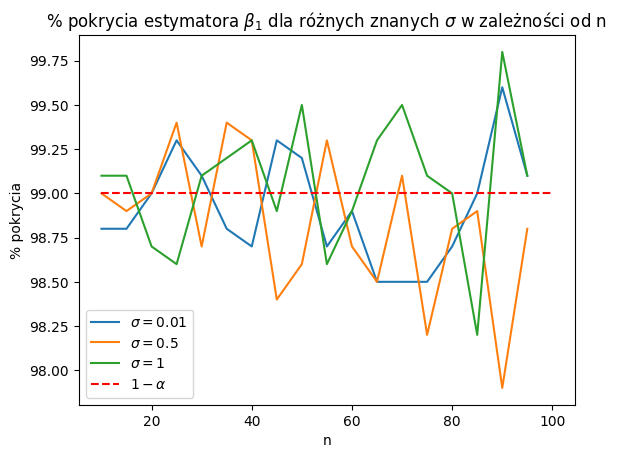

In [59]:
plt.plot(ns, p2_b1[0], label="$\\sigma = 0.01$")
plt.plot(ns, p2_b1[1], label="$\\sigma = 0.5$")
plt.plot(ns, p2_b1[2], label="$\\sigma = 1$")
plt.hlines((1-alpha)*100,10, 100, linestyle="--", color="red",label="$1-\\alpha$")
plt.legend(loc="best")
plt.title("% pokrycia estymatora $\\beta_1$ dla różnych znanych $\\sigma$ w zależności od n")
plt.xlabel("n")
plt.ylabel("% pokrycia")
plt.show()

Zadanie 2

In [12]:
sigma = 0.5

In [63]:
pb1_znana = []
pb0_znana = []
pb1_nieznana = []
pb0_nieznana = []
for n in ns:
    b1_prob_nieznana, b0_prob_nieznana = mc_test(n, sigma, b0, b1, mc, alpha, False)
    b1_prob_znana, b0_prob_znana = mc_test(n, sigma, b0, b1, mc, alpha, True)
    pb1_znana.append(b1_prob_znana)
    pb0_znana.append(b0_prob_znana)
    pb1_nieznana.append(b1_prob_nieznana)
    pb0_nieznana.append(b0_prob_nieznana)
    

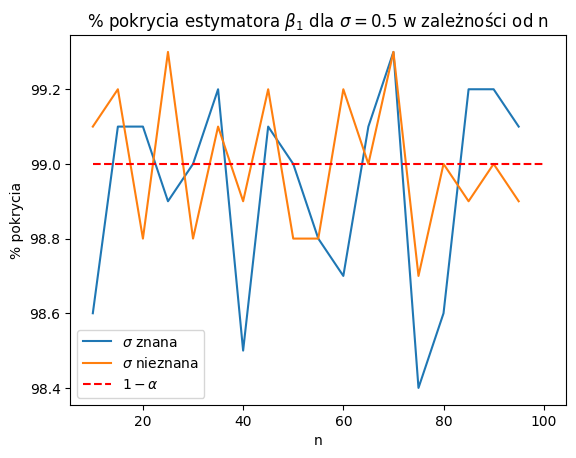

In [69]:
plt.plot(ns, pb1_znana, label="$\\sigma$ znana")
plt.plot(ns, pb1_nieznana, label="$\\sigma$ nieznana")
plt.hlines((1-alpha)*100,10, 100, linestyle="--", color="red",label="$1-\\alpha$")
plt.legend(loc="best")
plt.title("% pokrycia estymatora $\\beta_1$ dla $\\sigma = 0.5$ w zależności od n")
plt.xlabel("n")
plt.ylabel("% pokrycia")
plt.show()

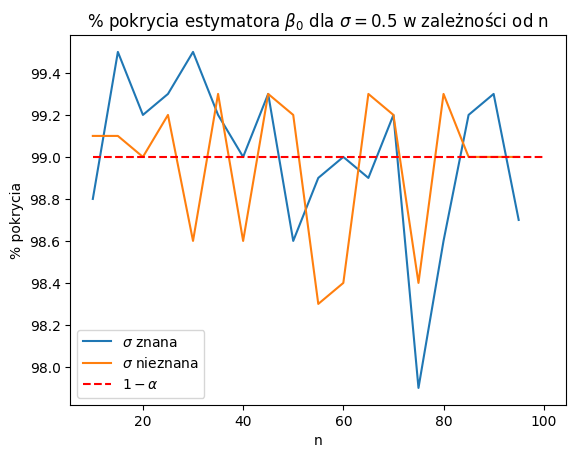

In [68]:
plt.plot(ns, pb0_znana, label="$\\sigma$ znana")
plt.plot(ns, pb0_nieznana, label="$\\sigma$ nieznana")
plt.hlines((1-alpha)*100,10, 100, linestyle="--", color="red",label="$1-\\alpha$")
plt.legend(loc="best")
plt.title("% pokrycia estymatora $\\beta_0$ dla $\\sigma = 0.5$ w zależności od n")
plt.xlabel("n")
plt.ylabel("% pokrycia")
plt.show()

In [35]:
def pu_length(sigma, b0, b1, alpha,n):
    x, y = generate_sample(n, b0, b1, sigma)
    b1_hat, b0_hat = b1_estim(x,y), b0_estim(x,y)
    pu_b0_k, pu_b1_k = pu_b0_known_var(sigma, alpha, x), pu_b1_known_var(sigma, alpha, x)
    pu_b0_u, pu_b1_u = pu_b0_unknown_var(alpha, x, y, b1_hat, b0_hat), pu_b1_unknown_var(alpha, x, y, b1_hat)
    return pu_b0_u * 2 ,pu_b0_k * 2, pu_b1_u * 2, pu_b1_k *2

In [40]:
dlugosc_b1_znana = []
dlugosc_b0_znana = []
dlugosc_b1_nieznana = []
dlugosc_b0_nieznana = []
for n in ns:
    dlugosc_b1_znana_n = []
    dlugosc_b0_znana_n = []
    dlugosc_b1_nieznana_n = []
    dlugosc_b0_nieznana_n = []
    for _ in range(1000):
        b0_nieznana, b0_znana, b1_nieznana, b1_znana = pu_length(sigma, b0, b1, alpha, n)
        dlugosc_b1_znana_n.append(b1_znana)
        dlugosc_b0_znana_n.append(b0_znana)
        dlugosc_b1_nieznana_n.append(b1_nieznana)
        dlugosc_b0_nieznana_n.append(b0_nieznana)
    dlugosc_b1_znana.append(np.mean(dlugosc_b1_znana_n))
    dlugosc_b0_znana.append(np.mean(dlugosc_b0_znana_n))
    dlugosc_b1_nieznana.append(np.mean(dlugosc_b1_nieznana_n))
    dlugosc_b0_nieznana.append(np.mean(dlugosc_b0_nieznana_n))
    

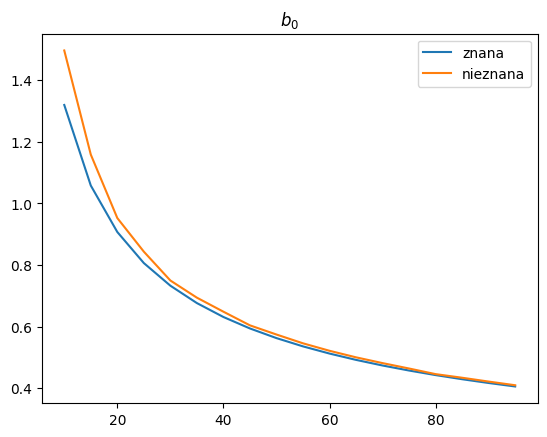

In [41]:
plt.plot(ns, dlugosc_b0_znana, label="znana")
plt.plot(ns, dlugosc_b0_nieznana, label="nieznana")
plt.title("$b_0$")
plt.legend(loc="best")
plt.show()

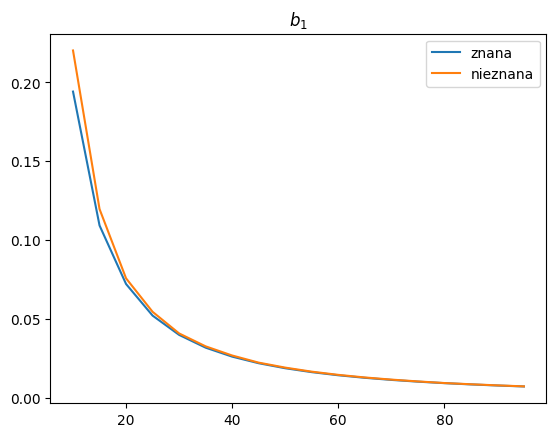

In [42]:
plt.plot(ns, dlugosc_b1_znana, label="znana")
plt.plot(ns, dlugosc_b1_nieznana, label="nieznana")
plt.title("$b_1$")
plt.legend(loc="best")
plt.show()

Zadanie 3

In [17]:
def mi0_estim(x,y, gamma):
    b0_hat, b1_hat = b0_estim(x,y), b1_estim(x,y)
    x_0 = np.mean(x) + gamma
    return b0_hat + b1_hat * x_0

In [18]:
def pu_mi0(x,y,gamma,alpha,sigma, b0, b1, known_var):
    n = len(x)
    x_0 = np.mean(x) + gamma
    if known_var:
        return mi0_estim(x,y,gamma) - stats.norm.ppf(1-alpha/2) * sigma * np.sqrt(1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2)), mi0_estim(x,y,gamma) + stats.norm.ppf(1-alpha/2) * sigma * np.sqrt(1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2))
    else:
        s_squared = np.sum((y - (b0 + b1 * x))**2) / (n - 2)
        s = np.sqrt(s_squared)
        return mi0_estim(x,y,gamma) - stats.t.ppf(1-alpha/2,n-2) * s * np.sqrt(1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2)), mi0_estim(x,y,gamma) + stats.t.ppf(1-alpha/2,n-2) * s * np.sqrt(1/n + (x_0 - np.mean(x))**2/np.sum((x-np.mean(x))**2))

In [19]:
ns = [1000, 2000, 5000]
sigmas = [0.5,1,3]
alpha = 0.05
gammas = [1,2,3]

In [23]:
for gamma in gammas:
    for sigma in sigmas:
        for n in ns:
            x, y = generate_sample(n,b0,b1,sigma)
            ci_known = pu_mi0(x, y, gamma, alpha, sigma, b0, b1, True)
            ci_unknown = pu_mi0(x, y, gamma, alpha, sigma, b0, b1, False)
            print(f"Dla alpha = {alpha}, sigma = {sigma}, gamma = {gamma},n = {n}")
            print(f"  Przedział ufności dla znanej wariancji: {ci_known}")
            print(f"  Przedział ufności dla nieznanej wariancji: {ci_unknown}")
            print("\n")

Dla alpha = 0.05, sigma = 0.5, gamma = 1,n = 1000
  Przedział ufności dla znanej wariancji: (np.float64(1004.9580708387142), np.float64(1005.0200507130775))
  Przedział ufności dla nieznanej wariancji: (np.float64(1004.9580137386313), np.float64(1005.0201078131604))


Dla alpha = 0.05, sigma = 0.5, gamma = 1,n = 2000
  Przedział ufności dla znanej wariancji: (np.float64(2004.977786477275), np.float64(2005.0216126699775))
  Przedział ufności dla nieznanej wariancji: (np.float64(2004.9781780852004), np.float64(2005.021221062052))


Dla alpha = 0.05, sigma = 0.5, gamma = 1,n = 5000
  Przedział ufności dla znanej wariancji: (np.float64(5004.997332718394), np.float64(5005.025050801531))
  Przedział ufności dla nieznanej wariancji: (np.float64(5004.997385846928), np.float64(5005.0249976729965))


Dla alpha = 0.05, sigma = 1, gamma = 1,n = 1000
  Przedział ufności dla znanej wariancji: (np.float64(1004.934288060036), np.float64(1005.0582478087628))
  Przedział ufności dla nieznanej wariancji:

Zadanie 4

In [127]:
import pandas as pd

In [128]:
alpha = 0.05

In [130]:
dane = np.array(np.loadtxt(r"C:\Users\rafal\OneDrive\Dokumente\GitHub\Komputerowa-analiza-szeregow-czasowych\dane4.txt"))

In [131]:
dane = sorted(dane, key=lambda x: x[0])

In [132]:
x=[]
y= []
for c in dane:
    x.append(c[0])
    y.append(c[1])

In [133]:
x = np.array(x)
y = np.array(y)

In [134]:
def prosta_regresji(x,y):
    b_1 = np.sum(x*(y-np.mean(y)))/np.sum((x-np.mean(x))**2)
    b_0 = np.mean(y) - b_1 * np.mean(x)
    return b_0, b_1

In [135]:
def generate_sample2(n, b0, b1, sigma):
    eps = np.random.normal(0, sigma, n)
    x = np.linspace(1, n+1, n)
    y = b1 * x + b0 + eps
    return x, y

In [136]:
x_train, y_train = x[:990], y[:990]

In [137]:
b0_r, b1_r = prosta_regresji(x_train, y_train)

In [138]:
x_test, y_test = x[990:], y[990:]

In [139]:
y_pred = b1_r * x_test + b0_r

In [140]:
y_hat = b1_r * x_train + b0_r

In [148]:
def pu_y_pred(x_0):
    n = len(x_train)
    s_squared = np.sum((y_train - y_hat)**2)/(n-2)
    return stats.t.ppf(1 - alpha/2, n - 2) * np.sqrt((s_squared*(1+1/n+(x_0 - np.mean(x_train))**2/np.sum((x_train - np.mean(x_train))**2))))

In [149]:
lower = []
higher = []
for i,x_0 in enumerate(x_test):
    t = pu_y_pred(x_0)
    lower.append(y_pred[i] - t)
    higher.append(y_pred[i] + t)

In [150]:
y_all = b1_r * x + b0_r

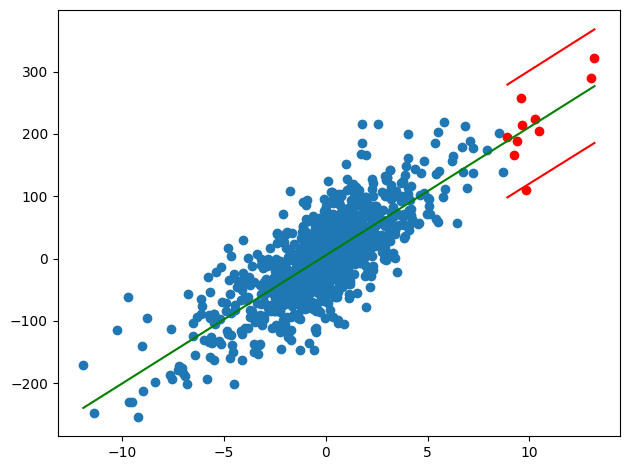

In [152]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="r")
plt.plot(x, y_all, color="green")
plt.plot(x_test, higher, color="red")
plt.plot(x_test, lower, color="red")
plt.tight_layout()
plt.show()